In [28]:
import shutil
import os

In [29]:
!unzip train.zip

Archive:  train.zip
replace dataset/непутин.0.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [30]:
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image

X = []
y = []
for item in sorted(os.listdir("dataset")):
    if (item.startswith('путин')):
      rgba_image = PIL.Image.open("dataset/" + item.__str__())
      rgb_image = rgba_image.convert('RGB')
      X.append(np.array(rgb_image) / 255)
      y.append(1)
    if (item.startswith('непутин')):
      rgba_image = PIL.Image.open("dataset/" + item.__str__())
      rgb_image = rgba_image.convert('RGB')
      X.append(np.array(rgb_image) / 255)
      y.append(0)
X[0].shape      

(150, 150, 3)

In [31]:
labels = ['Путин', 'Не Путин']
labels

['Путин', 'Не Путин']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(y_test)

[1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0]


In [33]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, RandomContrast, RandomRotation, RandomTranslation, RandomFlip
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

In [34]:
from keras import backend as K
# Количество эпох
epochs = 10
# Размер мини-выборки
batch_size = 25
def recall_m(y_true, y_pred):#Полнота
 print(type(y_true))
 true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
 possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
 recall = true_positives / (possible_positives + K.epsilon())
 return recall
def precision_m(y_true, y_pred):#Точность
 true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
 predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
 precision = true_positives / (predicted_positives + K.epsilon())
 return precision
def f1_m(y_true, y_pred):#F1-мера
 precision = precision_m(y_true, y_pred)
 recall = recall_m(y_true, y_pred)
 return 2*((precision*recall)/(precision+recall+K.epsilon()))




In [35]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, (2, 2), activation='relu'))
model.add(Flatten())
model.add(Dense(512,  activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))

In [36]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 35, 35, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 33, 33, 256)      

In [37]:
history=model.fit(
    np.array(X_train), np.array(y_train), validation_data=(np.array(X_test), np.array(y_test)),
    epochs=25)

Epoch 1/25
6/6 [==============================] - 1s 132ms/step - loss: 0.7010 - accuracy: 0.4675 - val_loss: 0.6929 - val_accuracy: 0.5349
Epoch 2/25
6/6 [==============================] - 0s 81ms/step - loss: 0.6944 - accuracy: 0.4911 - val_loss: 0.6927 - val_accuracy: 0.4884
Epoch 3/25
6/6 [==============================] - 0s 81ms/step - loss: 0.6942 - accuracy: 0.5325 - val_loss: 0.6932 - val_accuracy: 0.4884
Epoch 4/25
6/6 [==============================] - 0s 81ms/step - loss: 0.6950 - accuracy: 0.4320 - val_loss: 0.6928 - val_accuracy: 0.4884
Epoch 5/25
6/6 [==============================] - 0s 81ms/step - loss: 0.6923 - accuracy: 0.5444 - val_loss: 0.6871 - val_accuracy: 0.7907
Epoch 6/25
6/6 [==============================] - 0s 81ms/step - loss: 0.6725 - accuracy: 0.6805 - val_loss: 0.5796 - val_accuracy: 0.6977
Epoch 7/25
6/6 [==============================] - 0s 81ms/step - loss: 0.6316 - accuracy: 0.7041 - val_loss: 0.6662 - val_accuracy: 0.6744
Epoch 8/25
6/6 [==========

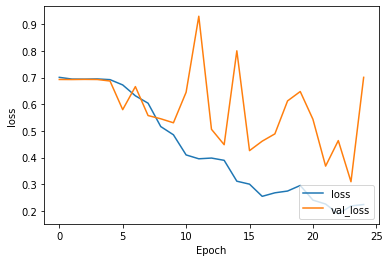

In [38]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')

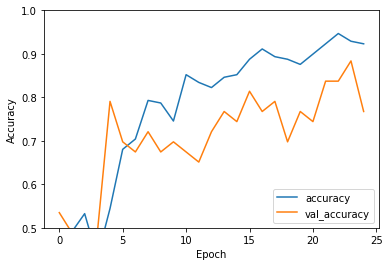

In [39]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [40]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
#Augmentation Images
model2.add(RandomFlip("horizontal_and_vertical"))
#Augmentation Images
model2.add(Conv2D(4, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(3, 3)))
model2.add(Conv2D(8, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(3, 3)))
model2.add(Conv2D(16, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(3, 3)))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
# model2.add(Conv2D(128, (3, 3)))
# model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(128,  activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(1))

In [41]:
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model2.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 random_flip_1 (RandomFlip)  (None, 148, 148, 32)      0         
                                                                 
 conv2d_20 (Conv2D)          (None, 146, 146, 4)       1156      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 48, 48, 4)        0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 46, 46, 8)         296       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 15, 15, 8)        0         
 g2D)                                                 

In [42]:
history2=model2.fit(
    np.array(X_train), np.array(y_train), validation_data=(np.array(X_test), np.array(y_test)),
    epochs=25)

Epoch 1/25
6/6 [==============================] - 1s 97ms/step - loss: 1.5700 - accuracy: 0.5207 - val_loss: 0.6795 - val_accuracy: 0.5349
Epoch 2/25
6/6 [==============================] - 0s 45ms/step - loss: 0.7308 - accuracy: 0.5385 - val_loss: 0.6628 - val_accuracy: 0.5814
Epoch 3/25
6/6 [==============================] - 0s 44ms/step - loss: 0.6744 - accuracy: 0.6036 - val_loss: 0.6782 - val_accuracy: 0.4884
Epoch 4/25
6/6 [==============================] - 0s 44ms/step - loss: 0.6498 - accuracy: 0.5858 - val_loss: 0.6044 - val_accuracy: 0.7907
Epoch 5/25
6/6 [==============================] - 0s 44ms/step - loss: 0.6040 - accuracy: 0.6982 - val_loss: 0.5582 - val_accuracy: 0.7907
Epoch 6/25
6/6 [==============================] - 0s 45ms/step - loss: 0.5800 - accuracy: 0.7219 - val_loss: 0.5583 - val_accuracy: 0.8372
Epoch 7/25
6/6 [==============================] - 0s 45ms/step - loss: 0.5476 - accuracy: 0.7337 - val_loss: 0.4951 - val_accuracy: 0.8837
Epoch 8/25
6/6 [===========

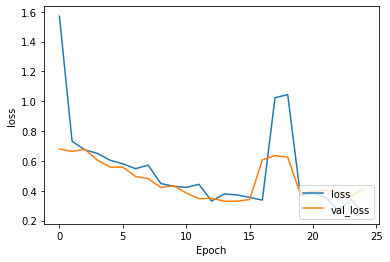

In [43]:
plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')

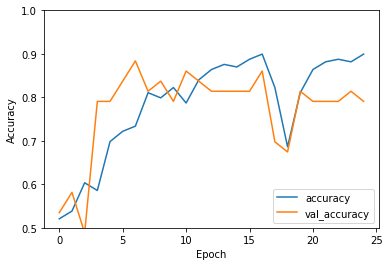

In [44]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [45]:
model.save('Course_work_1.h5')
model2.save('Course_work_2.h5')

In [46]:
!pip install opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


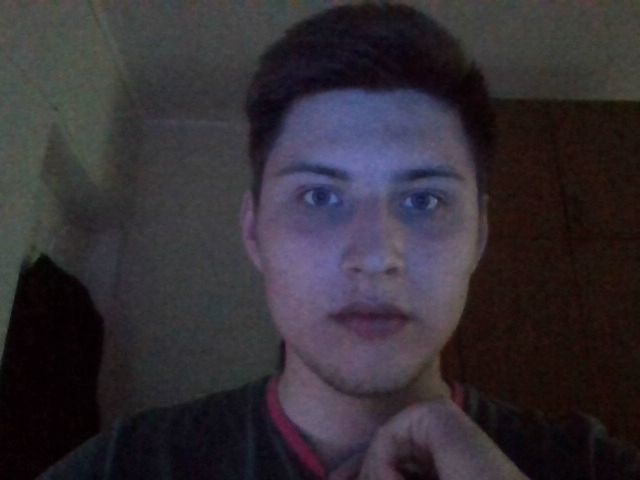

In [48]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  display(Image(filename))
except Exception as err:
  print(str(err))

In [49]:
from tensorflow.keras.models import load_model
import cv2

In [50]:
entered_image = PIL.Image.open("photo.jpg")
img_array = cv2.imread("photo.jpg")
img_array = cv2.cvtColor(img_array ,cv2.COLOR_BGR2RGB)
new_array = cv2.resize(img_array, (150, 150))
test_given_image=new_array/255
test_given_image = np.reshape(test_given_image, (-1, 150,150,3))
test_given_image.shape

(1, 150, 150, 3)

In [51]:
model = load_model('Course_work_1.h5')
prediction = model.predict(test_given_image)
print(prediction)

[[0.09591832]]


In [52]:
model_2 = load_model('Course_work_2.h5')
prediction = model_2.predict(test_given_image)
print(prediction)

[[0.03834487]]


In [ ]:
for i in range(20):
  n=i
  x=np.expand_dims(X_test[n], axis=0)
  y=y_test[n]
  res=model.predict(x)
  print(res)
  print(y)
  plt.imshow(X_test[n], cmap=plt.cm.binary)
  plt.show()

In [ ]:
for i in range(20):
  n=i
  x=np.expand_dims(X_test[n], axis=0)
  y=y_test[n]
  res=model2.predict(x)
  print(res)
  print(y)
  plt.imshow(X_test[n], cmap=plt.cm.binary)
  plt.show()

In [56]:
model.save_weights('model_weights.h5')
model2.save_weights('model2_weights.h5')